# Introduction

With every passing day, variety of criminal activities are increasing especially over cyber space. Illegal transactions such as fraud and money-laundering are happening over digital platforms such as blockchain or dark webs. However, an important destination for most money-laundering activities would be banks. This places a huge emphasis on anti-money laundering system and regulations inplace for banks to combat these globally concerning crimes. With usage of data analytics and Machine Learning, I hope to work on a simulated business problem related to a bank in combating and detecting bank account frauds.

# Business Problem

In this simulated case, I am tackling the business problem as a consultant to provide business solutions to the bank. There are 2 objectives that will be achieved at the end of this project.

Objectives:
1. Train and deploy an ML model to classify whether the bank account is opened for purpose of fraud or not for fraud.
2. Provide additional business advice on recommendations in improving the bank's anti-money laundering and fraud detection measures.
3. Discover and explore any flaws or loopholes in policies.
4. Provide any other notable insights.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn as sk
import seaborn as sns

# Exploratory Data Analysis

In [2]:
bank_data = pd.read_csv("Variant II.csv")
print(bank_data.shape)

(1000000, 32)


In [3]:
bank_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.123474,-1,149,30,0.027608,21.599012,AA,1034,...,0,200.0,0,INTERNET,14.851445,other,0,1,0,4
1,0,0.8,0.166159,-1,97,50,0.015207,-1.136921,AB,1371,...,0,200.0,0,INTERNET,9.873092,windows,1,1,0,5
2,0,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,0,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
4,0,0.4,0.339627,-1,61,50,0.001281,-0.938068,AB,1206,...,0,200.0,0,INTERNET,19.851689,windows,0,1,0,2


In [4]:
bank_data.loc[:,['fraud_bool','phone_home_valid', 'phone_mobile_valid']] = bank_data.loc[:,['fraud_bool','phone_home_valid', 'phone_mobile_valid']].astype(bool)
bank_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,0.7,0.123474,-1,149,30,0.027608,21.599012,AA,1034,...,0,200.0,0,INTERNET,14.851445,other,0,1,0,4
1,False,0.8,0.166159,-1,97,50,0.015207,-1.136921,AB,1371,...,0,200.0,0,INTERNET,9.873092,windows,1,1,0,5
2,False,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,False,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
4,False,0.4,0.339627,-1,61,50,0.001281,-0.938068,AB,1206,...,0,200.0,0,INTERNET,19.851689,windows,0,1,0,2


In [5]:
def measure_compress(value, tick_num):
    return f'{int(value/1000)}K'

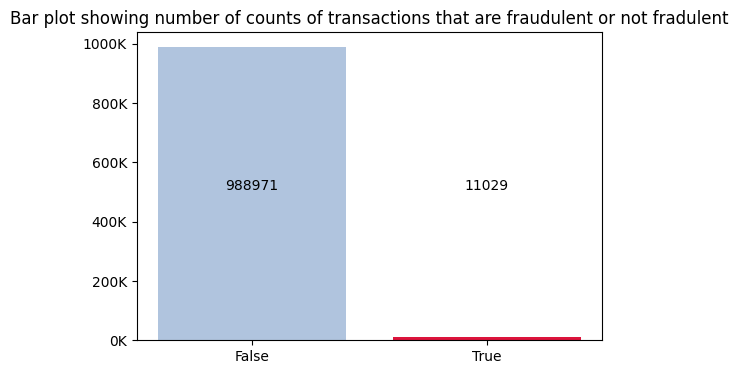

In [6]:
fraud_bool = pd.unique(bank_data.loc[:,'fraud_bool'])
fraud_bool_counts = bank_data.loc[:,'fraud_bool'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(x = ['False', 'True'], height = fraud_bool_counts, color = ['lightsteelblue','crimson'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of transactions that are fraudulent or not fradulent")
plt.show()

In [7]:
# Percentage of fraudulent bank accounts over total dataset.
fraud_bool_counts[1]/(fraud_bool_counts[0]+fraud_bool_counts[1])

0.011029

Based on the bar chart above, it seems that the population of fraudulent bank accounts is significantly lower than non-fraudulent bank accounts and forming only about 11.029% of dataset. Firstly, this implies that I will need strategically perform data analysis on the dataset if I wish to investigate any form of relationship related to fraudulent vs non-fraudulent bank accounts. Secondly, with under-representation of fraudulent data, I will need to perform techniques that will provide me close to or equal amount of fraudulent and non-fraudulent bank account data in order to train a predictive model to be robust with high level of accuracy, recall and precision as well.

The next step would be to find out more about the demographics of the bank's applicants from the 1,000,000 samples that is given to me.

## Demographics of Customers

First I would like to get a sense of the data and information about the demographics of the applicants of the bank.

In [8]:
employ_status = np.unique(bank_data['employment_status'])
employ_status

array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object)

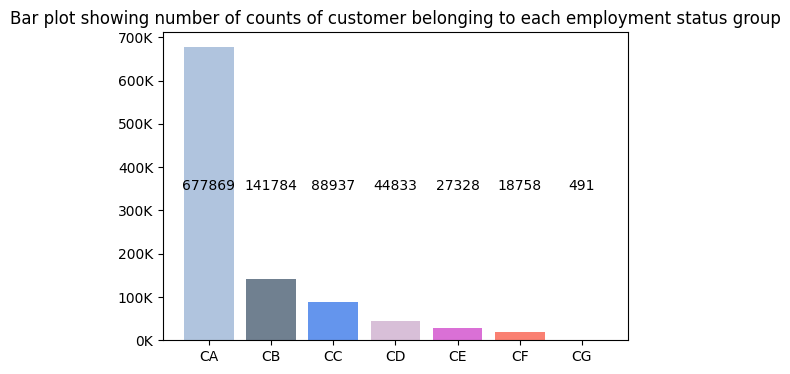

In [9]:
employ_status_counts = bank_data.loc[:,'employment_status'].value_counts()
employ_status_counts

plt.figure(figsize=(6,4))
bars = plt.bar(x = employ_status, height = employ_status_counts, color = ['lightsteelblue','slategray', 'cornflowerblue',
                                                                          'thistle', 'orchid', 'salmon', 'indianred'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of customer belonging to each employment status group")
plt.show()

Based on the bar chart above, there seems to be significantly and marginally low number of applicants belonging to 'CG' employment status, with only 491 of them out of 1,000,000 applicants. Out of the applicants, 'CA' applicants comprise majority of the applicants, forming 67.79% of the dataset. This tells us that on average, there will be more frequent applicants belonging to 'CG' employment status.

In [10]:
CA_data = bank_data[bank_data['employment_status']=="CA"]
CA_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
2,False,0.6,0.328567,-1,165,50,0.039634,24.077611,AA,1451,...,1,200.0,0,INTERNET,9.318093,linux,0,1,0,0
3,False,0.7,0.503447,-1,201,50,0.011845,-0.766643,AC,1034,...,1,200.0,0,INTERNET,59.810853,windows,1,1,0,1
5,False,0.8,0.896062,-1,29,40,0.011791,-0.968362,AB,1235,...,0,510.0,0,INTERNET,10.421451,other,1,1,0,4
6,False,0.9,0.754345,11,12,30,0.009775,-0.797821,AD,1784,...,0,1500.0,0,INTERNET,3.283401,windows,1,1,0,0
7,False,0.2,0.637783,-1,51,20,0.035510,-1.183973,AD,1155,...,0,200.0,0,INTERNET,3.575177,other,1,1,0,4


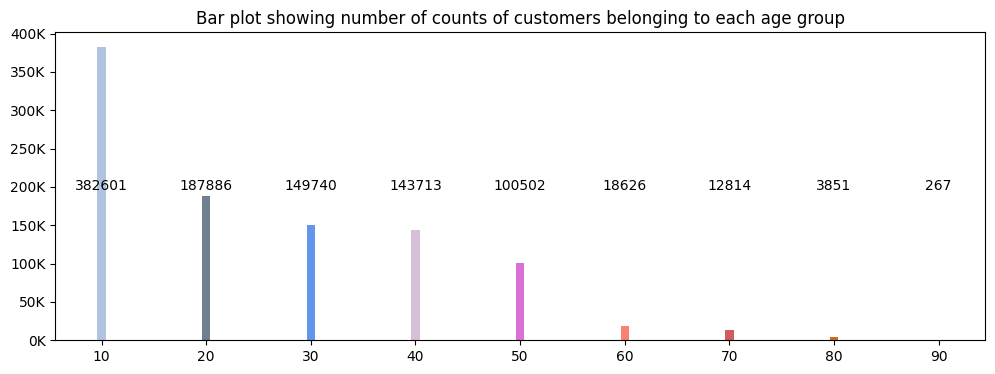

In [11]:
cust_age = np.unique(bank_data.loc[:,'customer_age'])
cust_age_counts = bank_data.loc[:,'customer_age'].value_counts()

plt.figure(figsize=(12,4))
bars = plt.bar(x = cust_age, height = cust_age_counts, color = ['lightsteelblue','slategray', 'cornflowerblue',
                                                                'thistle', 'orchid', 'salmon', 'indianred', 'chocolate', 'gold'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of customers belonging to each age group")
plt.show()

Based on the bar plot above, the dataset seem to comprise of majority of applicants age 1 - 10, and the age group with least counts would be 80 to 90. (Might need to do feature engineering on this.)

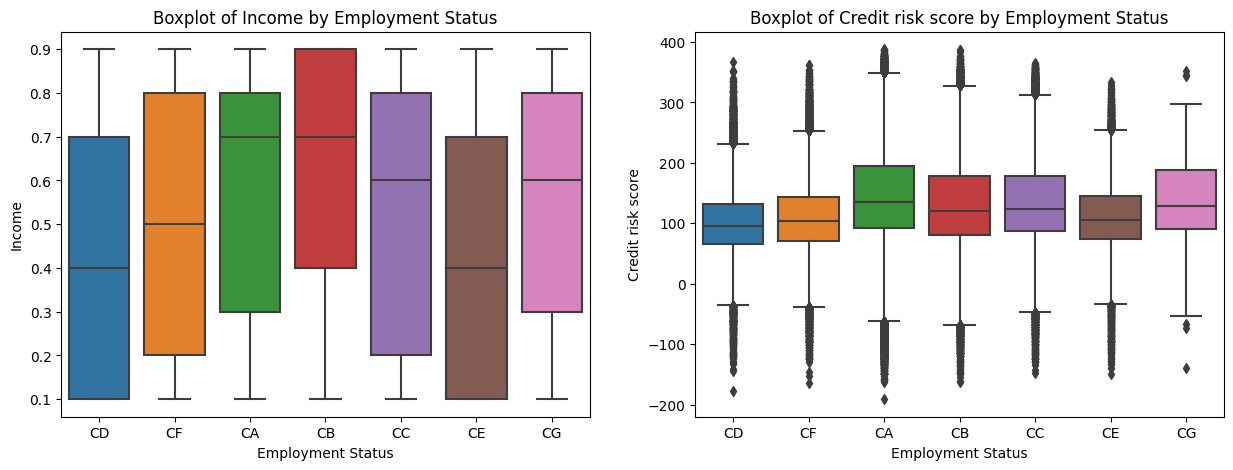

<Figure size 800x400 with 0 Axes>

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

plt.figure(figsize = (8,4))
sns.boxplot(x = 'employment_status', y = 'income', data = bank_data, ax = axes[0]) 
axes[0].set_title('Boxplot of Income by Employment Status')
axes[0].set_xlabel('Employment Status')
axes[0].set_ylabel('Income')

sns.boxplot(x = 'employment_status', y = 'credit_risk_score' , data = bank_data, ax = axes[1])
axes[1].set_title('Boxplot of Credit risk score by Employment Status')
axes[1].set_xlabel('Employment Status')
axes[1].set_ylabel('Credit risk score')

plt.tight_layout()
plt.show()

According the the box-and-whisker plots above, the mean income of 'CA' and 'CB' employment status seems to be the highest out of all the categories of employment statuses. As for the mean credit risk score, most employment statuses ranges between 150 to slightly below 100, with 'CA' and 'CG' seemingly being the highest amongst the categories.

This gave me some ideas in finding out more about the proportion of fraudulent vs non-fraudulent accounts amongst the applicants.

Additionally, I realise it is important to explore the relationship between income and credit risk score since credit risk score is scoring metrics that is used by banks to evaluate on how likely an individual is able to repay his debt promptly. Income is one important contributing factor in determining an individual's level of ability in repayment of his debt.

In [13]:
true_fraud = bank_data.loc[: , 'fraud_bool'] == True
true_fraud_data = bank_data[true_fraud]
fraud_employ_counts = true_fraud_data.loc[:,'employment_status'].value_counts()
fraud_employ_counts

employment_status
CA    8160
CC    1756
CB     909
CD      94
CF      68
CE      37
CG       5
Name: count, dtype: int64

In [14]:
false_fraud = bank_data.loc[: , 'fraud_bool'] == False
false_fraud_data = bank_data[false_fraud]
sampled_false_fraud = false_fraud_data.sample(n=fraud_bool_counts[1], replace = False, random_state = 42, axis = 0)
false_fraud_analyse = sampled_false_fraud.copy()
false_fraud_analyse.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
519601,False,0.8,0.435758,-1,47,50,0.014814,47.543008,AA,1779,...,1,200.0,0,INTERNET,4.405414,linux,1,1,0,3
568450,False,0.2,0.920403,-1,200,30,0.006302,102.423085,AA,4549,...,0,500.0,0,INTERNET,4.920013,linux,1,1,0,2
269923,False,0.9,0.357143,33,6,30,0.013114,15.579194,AA,498,...,1,500.0,0,INTERNET,19.038605,other,0,1,0,5
376393,False,0.6,0.641126,-1,86,50,0.006862,98.134421,AA,849,...,0,200.0,0,INTERNET,4.368656,windows,1,1,0,2
559517,False,0.1,0.999153,-1,40,60,0.030651,-1.108991,AB,1139,...,0,500.0,0,INTERNET,12.000492,other,0,2,0,5


In [15]:
true_fraud_analyse = true_fraud_data.copy()
true_fraud_analyse.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
52,True,0.9,0.643098,-1,61,50,0.029886,36.213268,AA,1289,...,0,200.0,0,INTERNET,1.265876,linux,1,1,0,2
126,True,0.9,0.876454,-1,32,50,0.012567,-1.283651,AC,504,...,0,200.0,0,INTERNET,4.348160,windows,1,1,0,5
226,True,0.8,0.670902,-1,160,40,0.031741,-0.687989,AA,586,...,0,1500.0,0,INTERNET,18.997669,windows,1,1,0,0
412,True,0.9,0.648131,-1,63,50,0.015711,101.481624,AA,1498,...,0,500.0,0,INTERNET,1.742214,windows,1,1,0,5
456,True,0.4,0.547154,-1,265,50,9.420293,-0.391805,AC,1086,...,0,1000.0,0,INTERNET,10.821237,x11,0,1,0,2


In [16]:
fraud_analyse = pd.concat([false_fraud_analyse, true_fraud_analyse])
fraud_analyse.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
519601,False,0.8,0.435758,-1,47,50,0.014814,47.543008,AA,1779,...,1,200.0,0,INTERNET,4.405414,linux,1,1,0,3
568450,False,0.2,0.920403,-1,200,30,0.006302,102.423085,AA,4549,...,0,500.0,0,INTERNET,4.920013,linux,1,1,0,2
269923,False,0.9,0.357143,33,6,30,0.013114,15.579194,AA,498,...,1,500.0,0,INTERNET,19.038605,other,0,1,0,5
376393,False,0.6,0.641126,-1,86,50,0.006862,98.134421,AA,849,...,0,200.0,0,INTERNET,4.368656,windows,1,1,0,2
559517,False,0.1,0.999153,-1,40,60,0.030651,-1.108991,AB,1139,...,0,500.0,0,INTERNET,12.000492,other,0,2,0,5


In [17]:
phone_home_valid = np.unique(bank_data.loc[:,'phone_home_valid'])
phone_mobile_valid = np.unique(bank_data.loc[:,'phone_mobile_valid'])

phone_home_valid_counts = bank_data.loc[:,'phone_home_valid'].value_counts()
phone_mobile_valid_counts = bank_data.loc[:,'phone_mobile_valid'].value_counts()

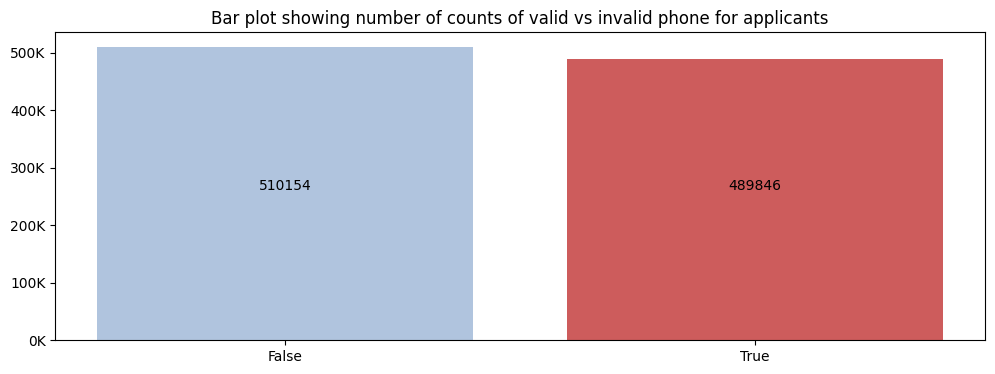

In [18]:
plt.figure(figsize=(12,4))
bars = plt.bar(x = ['False', 'True'], height = phone_home_valid_counts, color = ['lightsteelblue', 'indianred'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of valid vs invalid phone for applicants")
plt.show()

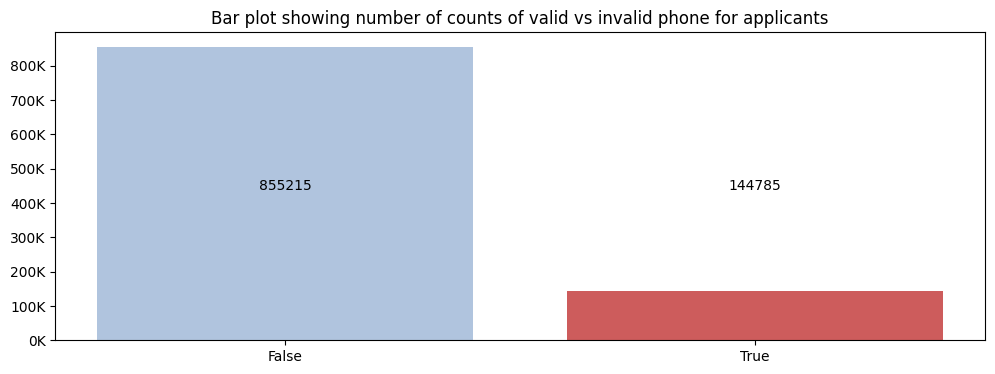

In [19]:
plt.figure(figsize=(12,4))
bars = plt.bar(x = ['False', 'True'], height = phone_mobile_valid_counts, color = ['lightsteelblue', 'indianred'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of valid vs invalid phone for applicants")
plt.show()

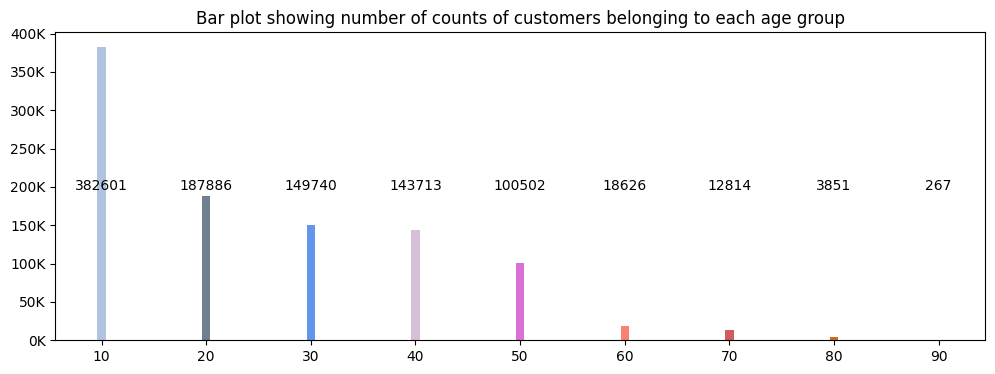

In [20]:
plt.figure(figsize=(12,4))
bars = plt.bar(x = cust_age, height = cust_age_counts, color = ['lightsteelblue','slategray', 'cornflowerblue',
                                                                'thistle', 'orchid', 'salmon', 'indianred', 'chocolate', 'gold'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of customers belonging to each age group")
plt.show()

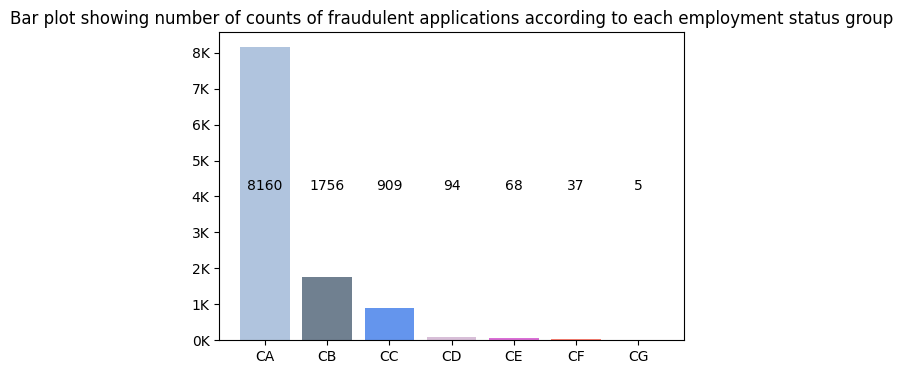

In [21]:
plt.figure(figsize=(6,4))
bars = plt.bar(x = employ_status, height = fraud_employ_counts, color = ['lightsteelblue','slategray', 'cornflowerblue',
                                                                          'thistle', 'orchid', 'salmon', 'indianred'])
y_middle = plt.gca().get_ylim()[1] / 2

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_middle, int(yval), ha='center', va='center')
    
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(measure_compress))
plt.title("Bar plot showing number of counts of fraudulent applications according to each employment status group")
plt.show()

C:\Users\Yu Bixun\anaconda3\envs\bank_fraud_detect_env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


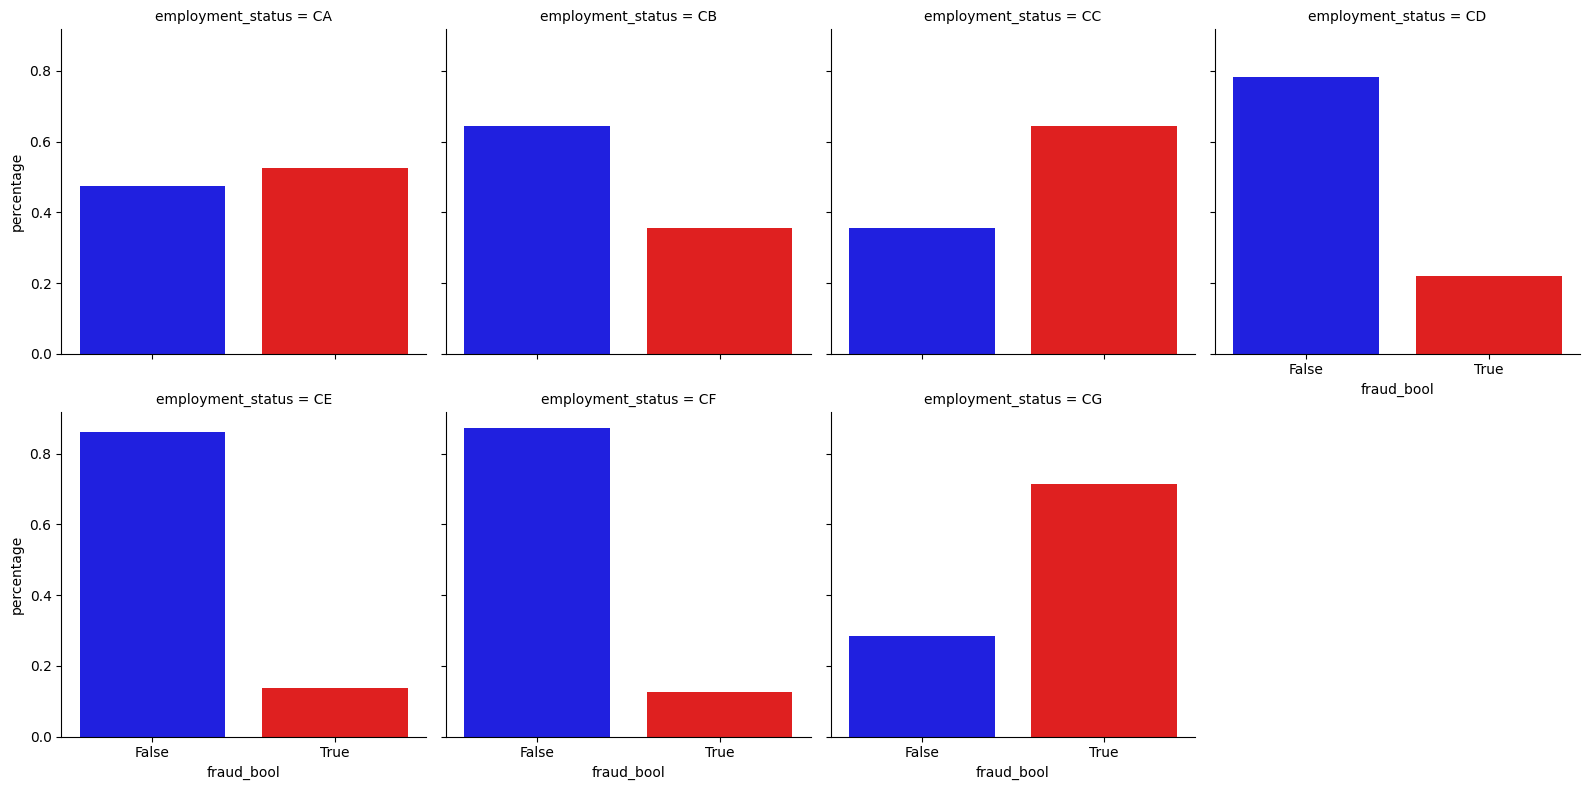

In [22]:
status_fraud = fraud_analyse.groupby(['employment_status', 'fraud_bool']).size().unstack(fill_value = 0)
status_fraud_percent = status_fraud.divide(status_fraud.sum(axis=1), axis=0)

status_fraud_percent = status_fraud_percent.stack().reset_index()
status_fraud_percent.columns = ['employment_status', 'fraud_bool', 'percentage']

# Create FacetGrid
status_fraud_grid = sns.FacetGrid(status_fraud_percent, col='employment_status', col_wrap=4, height=4)
status_fraud_grid.map(sns.barplot, 'fraud_bool', 'percentage',palette = {True: "red", False: "blue"})

C:\Users\Yu Bixun\anaconda3\envs\bank_fraud_detect_env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


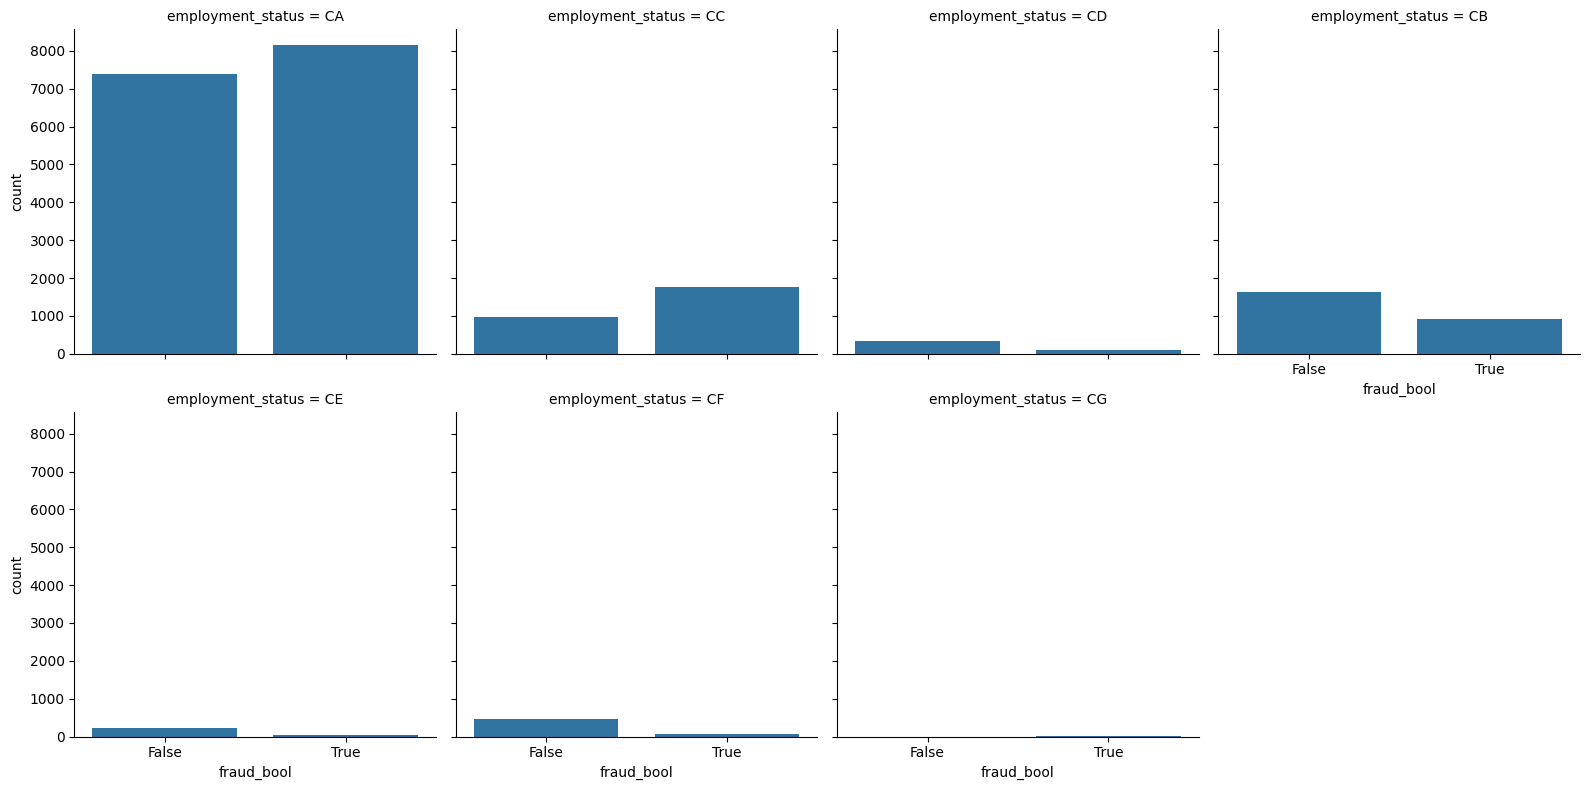

In [23]:
employ_status_fraud = sns.FacetGrid(fraud_analyse, col="employment_status", col_wrap=4, height=4)
employ_status_fraud.map(sns.countplot, "fraud_bool")
plt.show()

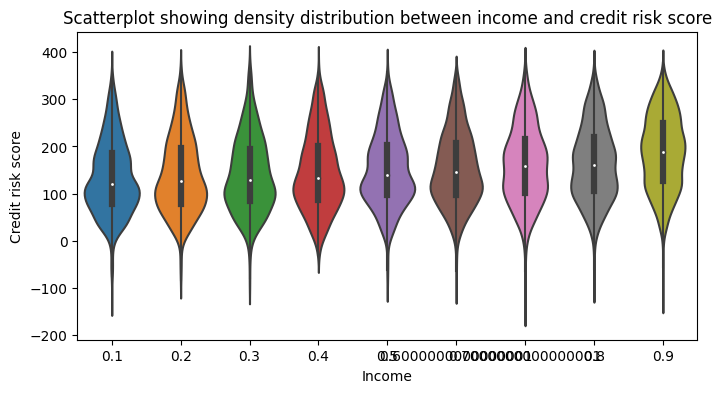

In [24]:
plt.figure(figsize = (8,4))
violin = sns.violinplot(data = fraud_analyse, x = 'income', y = 'credit_risk_score',orient = 'v')
plt.title("Scatterplot showing density distribution between income and credit risk score")
violin.set_xlabel("Income")
violin.set_ylabel("Credit risk score")
plt.show()

<Figure size 600x400 with 0 Axes>

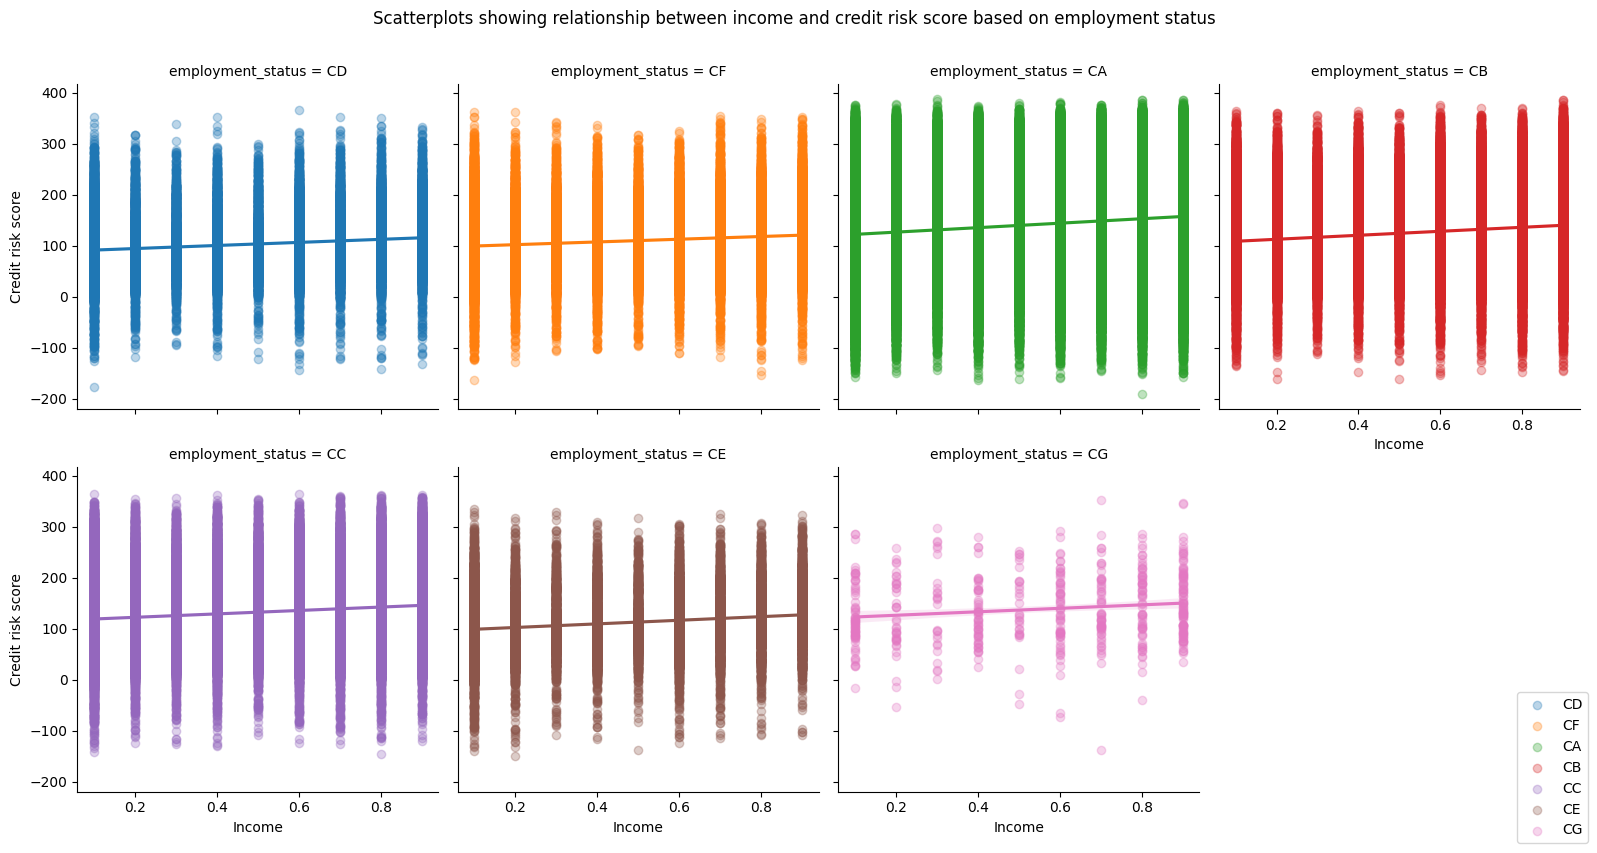

In [25]:
plt.figure(figsize = (6,4))
lmplot = sns.lmplot(x = 'income', y = 'credit_risk_score', hue = 'employment_status', col = 'employment_status', col_wrap = 4, 
           height = 4, aspect = 1, scatter_kws={'alpha':0.3}, data=bank_data)
lmplot.fig.suptitle('Scatterplots showing relationship between income and credit risk score based on employment status', y=1.05)
lmplot.fig.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1)
lmplot.set_axis_labels("Income", "Credit risk score")
plt.show()

Based on the scatterplots and regression of the credit risk score against income for each employment statuses, there seems to be really weak linear relationship for every employment statuses. This is strange as intuitively, firstly, credit risk score should linearly increase with income increment since this would indicate to banks the level of financial power in repayment of loans or overdrafts. Secondly, different employment statuses would normally result in different linear relationships (example: full-time employed vs part-time employed).

The credit risk score may be more heavily influenced or impacted by factors other than solely on income. To a certain extend it makes logical sense in the direction of corporate social responsibility as the banks would not wish to have income as a major factor in determining one's credit risk score as it can play a part in contributing to socio-economic discrimination.

## Information from Application Process

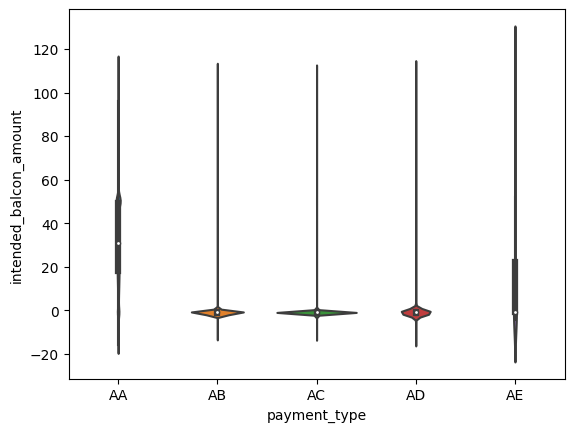

In [26]:
credit_payment_type = np.unique(bank_data.loc[:,'payment_type'])
credit_payment_count = bank_data.loc[:,'payment_type'].value_counts()

 
violin = sns.violinplot(data = bank_data, x = 'payment_type', y = 'intended_balcon_amount',orient = 'v')
plt.show()

In [27]:
# Notes
# no. of applications in same zip code + velocity 6 hr, 24 hr, 4 w high, any rs with bank branch count? 
# Rushing to open up bank account? --> find prev add month counts vs intended balcon amt.
# if email and name similarity, any rs with dob distinct emails? Maybe higher number = email/name similarity lower?
# Any relationship between bank branch couNT and intended balcon amount?
# email is free vs email name similarity --> maybe if email is free alone is not good determinant. But if combine similarity + free/paid?
# credit risk score vs credit card plans?
# no. of counts of application for each credit card plan
# proposed credit limit vs email similarity, 
# proposed credit limit vs fraud/non-fraud
# proposed credit limit vs income in terms of fraud.
# WHich credit card payment type normally has the highest intended balcon amount

# Which house status have the most fraud counts? --> rs between house status vs 
# explore rs between prev + current address months count
#home/mobile no. 


#Improvements
